In [1]:
import re
from collections import Counter
import matplotlib.pyplot as plt

In [8]:
# the tiny corpus of text ! 
text = 'red pink pink blue blue yellow ORANGE BLUE BLUE PINK purple purple' # 🌈
print(text)
print('string length : ',len(text))

red pink pink blue blue yellow ORANGE BLUE BLUE PINK purple purple
string length :  66


In [9]:
# Preprocessing
words = re.findall(r'\w+', text.lower())
print(words)
print('count : ', len(words))

['red', 'pink', 'pink', 'blue', 'blue', 'yellow', 'orange', 'blue', 'blue', 'pink', 'purple', 'purple']
count :  12


In [4]:
# Create vocabulary
vocab = set(words)
print(vocab)
print(len(vocab))

{'pink', 'orange', 'blue', 'red', 'yellow'}
5


In [5]:
# create covab withword count
counts_a = dict()
for w in words:
    counts_a[w] = counts_a.get(w,0) + 1
print(counts_a)
print(len(counts_a))

{'red': 1, 'pink': 3, 'blue': 4, 'yellow': 1, 'orange': 1}
5


In [12]:
counts_b = dict()
counts_b = Counter(words)
print(counts_b)
print('count: ', len(counts_b))

Counter({'blue': 4, 'pink': 3, 'purple': 2, 'red': 1, 'yellow': 1, 'orange': 1})
count:  6


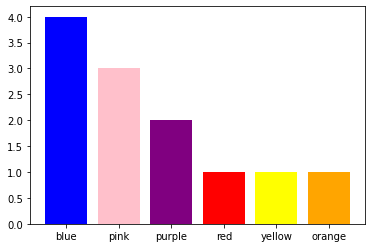

In [15]:
d = {'blue': counts_b['blue'], 'pink': counts_b['pink'], 'purple': counts_b['purple'], 'red': counts_b['red'], 'yellow': counts_b['yellow'], 'orange': counts_b['orange']}
plt.bar(range(len(d)), list(d.values()), align='center', color=d.keys())
_ = plt.xticks(range(len(d)), list(d.keys()))

In [16]:
# Create a list of candidate strings by applying an edit operation
word = 'dearz'

In [17]:
# splits with a loop
splits_a = []
for i in range(len(word)+1):
    splits_a.append([word[:i],word[i:]])

for i in splits_a:
    print(i)

['', 'dearz']
['d', 'earz']
['de', 'arz']
['dea', 'rz']
['dear', 'z']
['dearz', '']


In [18]:
splits_b = [(word[:i], word[i:]) for i in range(len(word) + 1)]

for i in splits_b:
    print(i)

('', 'dearz')
('d', 'earz')
('de', 'arz')
('dea', 'rz')
('dear', 'z')
('dearz', '')


In [20]:
# deletes with a loop
splits = splits_a
deletes = []

print('word', word)
for L,R in splits:
    if R:
        print(L+R[1:], '<-- delete ', R[0])

word dearz
earz <-- delete  d
darz <-- delete  e
derz <-- delete  a
deaz <-- delete  r
dear <-- delete  z


In [21]:
# breaking it down
print('word : ', word)
one_split = splits[0]
print('first item from the splits list : ', one_split)
L = one_split[0]
R = one_split[1]
print('L : ', L)
print('R : ', R)
print('*** now implicit delete by excluding the leading letter ***')
print('L + R[1:] : ',L + R[1:], ' <-- delete ', R[0])

word :  dearz
first item from the splits list :  ['', 'dearz']
L :  
R :  dearz
*** now implicit delete by excluding the leading letter ***
L + R[1:] :  earz  <-- delete  d


In [22]:
# deltes with list comprehension
deletes = [L + R[1:] for L, R in splits if R]
print(deletes)

['earz', 'darz', 'derz', 'deaz', 'dear']


In [26]:
vocab = ['dean','deer','dear','fries','and','coke']
edits = list(deletes)

set(vocab).intersection(edits)

{'dear'}